In [21]:
untraced = []
traced = []

TARGET_SPS = 0
ACTUAL_SPS = 1
CPU_USAGE = 2

with open('traced_50x.txt') as file:
    while True:
        line = file.readline()
        if not line:
            break
        
        traced.append([float(i) for i in line.split()])

traced_sps = [u[ACTUAL_SPS] for u in traced]
traced_cpu = [u[CPU_USAGE] for u in traced]

slice_by_sps = lambda sps, data, arg : list(map(lambda x : x[arg], filter(lambda x : x[TARGET_SPS] == sps, data)))



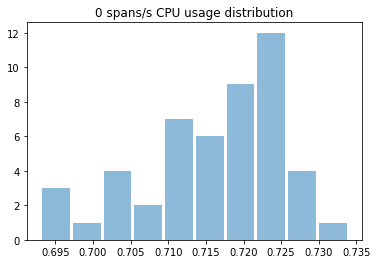

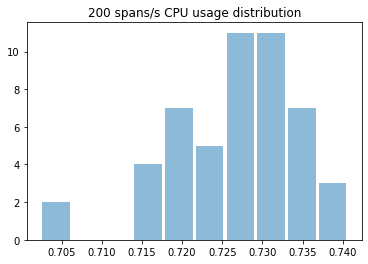

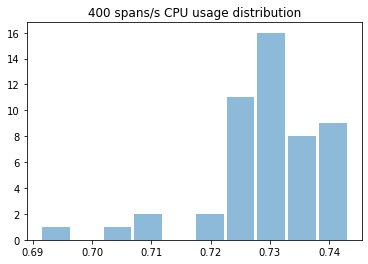

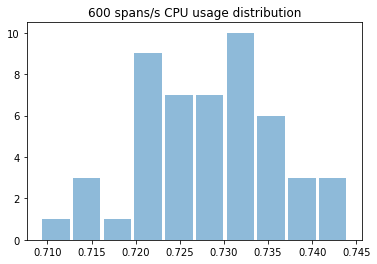

In [37]:
import matplotlib.pyplot as plt

traced_0_sps = slice_by_sps(0, traced, CPU_USAGE)
traced_0_sps.remove(min(traced_0_sps)) # remove a crazy outlier
traced_200_sps = slice_by_sps(200, traced, CPU_USAGE)
traced_400_sps = slice_by_sps(400, traced, CPU_USAGE)
traced_600_sps = slice_by_sps(600, traced, CPU_USAGE)

plt.title("0 spans/s CPU usage distribution")
plt.hist(traced_0_sps, alpha=0.5, rwidth=0.9)
plt.show()

plt.title("200 spans/s CPU usage distribution")
plt.hist(traced_200_sps, alpha=0.5, rwidth=0.9)
plt.show()

plt.title("400 spans/s CPU usage distribution")
plt.hist(traced_400_sps, alpha=0.5, rwidth=0.9)
plt.show()

plt.title("600 spans/s CPU usage distribution")
plt.hist(traced_600_sps, alpha=0.5, rwidth=0.9)
plt.show()

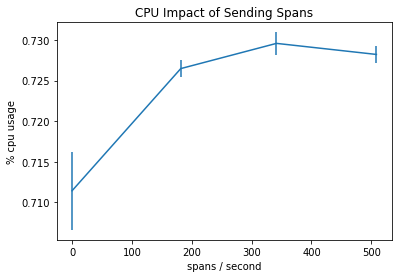

In [44]:
# 50 samples / point
# 2 second tests


mean_sps = []
mean_cpu_usage = []
stderr_cpu_usage = []

for sps in [0, 200, 400, 600]:
    cpu_usage = slice_by_sps(sps, traced, CPU_USAGE)
    
    mean_sps.append(np.mean(slice_by_sps(sps, traced, ACTUAL_SPS)))
    
    mean_cpu_usage.append(np.mean(cpu_usage))
    stderr_cpu_usage.append(np.std(cpu_usage) / np.sqrt(len(cpu_usage)))


plt.title("CPU Impact of Sending Spans")
plt.xlabel("spans / second")
plt.ylabel("% cpu usage")
plt.errorbar(mean_sps, mean_cpu_usage, yerr=stderr_cpu_usage)
plt.show()